In [1]:
!pip install tensorflow matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import random

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
#creating a function to display
def visualize_samples(X,y,num_samples=6):
  plt.figure()
  for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
  plt.show()


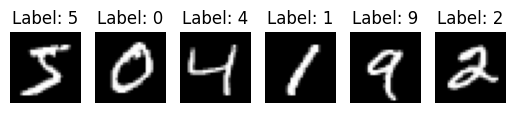

In [5]:
visualize_samples(X_train, y_train)

In [6]:
#normalizing data by applying formula to make it easy to calculate
X_train = X_train / 255.0
X_test = X_test / 255.0

#reshape data for efficient calculation
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
#building a neural network
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 27ms/step - accuracy: 0.9106 - loss: 0.2996 - val_accuracy: 0.9803 - val_loss: 0.0597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9842 - loss: 0.0532 - val_accuracy: 0.9826 - val_loss: 0.0556
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9893 - loss: 0.0337 - val_accuracy: 0.9843 - val_loss: 0.0470
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9844 - val_loss: 0.0474
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9882 - val_loss: 0.0385


In [18]:
def plot_training_history(history):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training And Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training And Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

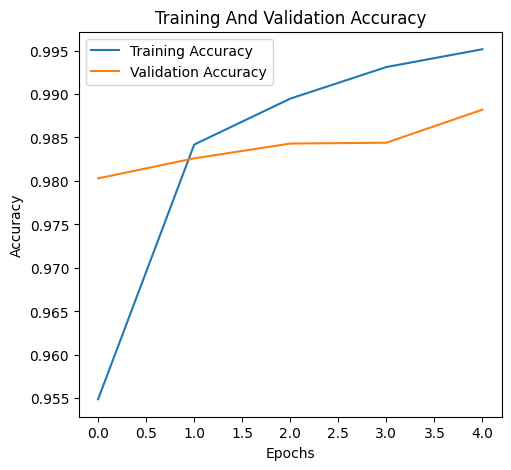

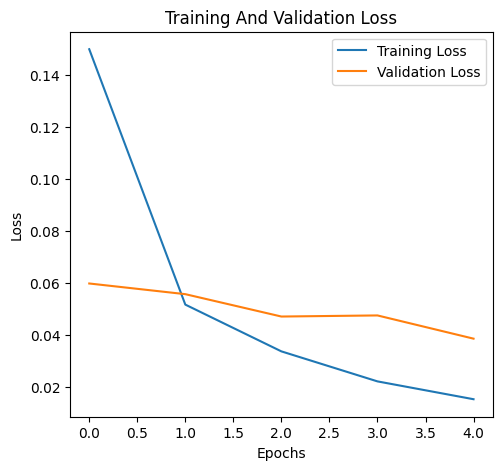

In [23]:
plot_training_history(history)

In [36]:
def visualize_random_predictions(X_test, y_test, model, num_samples=10):
  random_indices = random.sample(range(X_test.shape[0]), num_samples)

  X_random = X_test[random_indices]
  y_random = y_test[random_indices]

  predictions = model.predict(X_random)

  plt.figure(figsize=(10,2))
  for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_random[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = y_random[i]
    plt.title(f"Pred: {pred_label}\nTrue:{true_label}")
    plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


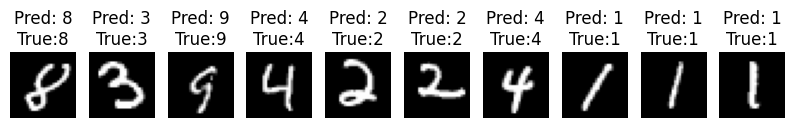

In [44]:
visualize_random_predictions(X_test, y_test, model)